In [12]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.dataset import PreprocessData

# Experiment configuration

In [2]:
# config
data_dir = "../data"
dataset = "PubMed_20k_RCT"

lower = True
stemming = True
rem_stop_words = True
lemmatisation = True

preprocess = True

# Preprocessing
The dataset is preprocessed and stored for future training.

In [3]:
preprocessor = PreprocessData(data_dir=data_dir, dataset=dataset, lower=lower, rem_stop_words=rem_stop_words, stemming=stemming, lemmatisation=lemmatisation)

if preprocess:
    df_dev, df_train, df_test = preprocessor.createFiles()
else:
    dataset_dir = os.path.join(data_dir, "processed_" + dataset)
    df_dev = pd.read_csv(os.path.join(dataset_dir, "dev.csv"))
    df_train = pd.read_csv(os.path.join(dataset_dir, "train.csv"))
    df_test = pd.read_csv(os.path.join(dataset_dir, "test.csv"))

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train["labels"])
y_test = label_encoder.transform(df_test["labels"])

x_train = df_train["sentences"]
x_test = df_test["sentences"]

Start preprocessing
Finished preprocessing


In [4]:
def print_metrics(pred_test, y_test, pred_train, y_train):
    print("test accuracy", str(np.mean(pred_test == y_test)))
    print("train accuracy", str(np.mean(pred_train == y_train)))
    print("\n Metrics and Confusion \n")
    print(metrics.confusion_matrix(y_test, pred_test))
    print(metrics.classification_report(y_test, pred_test))

# Training

In [5]:
pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("chi", SelectKBest(chi2, k=2000)),
    ("clf", KNeighborsClassifier(n_neighbors = 25))
])
pipeline.fit(x_train, y_train)
pred_train = pipeline.predict(x_train)
pred_test = pipeline.predict(x_test)
print_metrics(pred_test, y_test, pred_train, y_train)

test accuracy 0.617038930005642
train accuracy 0.6418412924157241

 Metrics and Confusion 

[[1373  383 1150  211  504]
 [ 525 1352 1309   91 1294]
 [ 448   87 8511   52  795]
 [ 422  196  991  452  272]
 [ 345  255 2184   25 6904]]
              precision    recall  f1-score   support

           0       0.44      0.38      0.41      3621
           1       0.59      0.30      0.40      4571
           2       0.60      0.86      0.71      9893
           3       0.54      0.19      0.29      2333
           4       0.71      0.71      0.71      9713

    accuracy                           0.62     30131
   macro avg       0.58      0.49      0.50     30131
weighted avg       0.61      0.62      0.59     30131



In [8]:
pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("chi", SelectKBest(chi2, k=2000)),
    ("clf", DecisionTreeClassifier(max_depth = 25))
])
pipeline.fit(x_train, y_train)
pred_train = pipeline.predict(x_train)
pred_test = pipeline.predict(x_test)
print_metrics(pred_test, y_test, pred_train, y_train)

test accuracy 0.5760512429059772
train accuracy 0.6231694851225529

 Metrics and Confusion 

[[ 424  635 2159  269  134]
 [ 138 1715 2092   98  528]
 [  80  197 9062  109  445]
 [ 206  288 1106  666   67]
 [  34  550 3604   35 5490]]
              precision    recall  f1-score   support

           0       0.48      0.12      0.19      3621
           1       0.51      0.38      0.43      4571
           2       0.50      0.92      0.65      9893
           3       0.57      0.29      0.38      2333
           4       0.82      0.57      0.67      9713

    accuracy                           0.58     30131
   macro avg       0.58      0.45      0.46     30131
weighted avg       0.61      0.58      0.55     30131



In [10]:
pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("chi", SelectKBest(chi2, k=2000)),
    ("clf", MLPClassifier(max_iter=100))
])
pipeline.fit(x_train, y_train)
pred_train = pipeline.predict(x_train)
pred_test = pipeline.predict(x_test)
print_metrics(pred_test, y_test, pred_train, y_train)

/home/remo/anaconda3/envs/ml4h/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


test accuracy 0.7124224220902061
train accuracy 0.9878280482655941

 Metrics and Confusion 

[[1875  636  310  645  155]
 [ 660 2734  259  296  622]
 [ 306  261 8162  244  920]
 [ 663  251  282 1064   73]
 [ 188  721 1086   87 7631]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      3621
           1       0.59      0.60      0.60      4571
           2       0.81      0.83      0.82      9893
           3       0.46      0.46      0.46      2333
           4       0.81      0.79      0.80      9713

    accuracy                           0.71     30131
   macro avg       0.64      0.64      0.64     30131
weighted avg       0.71      0.71      0.71     30131



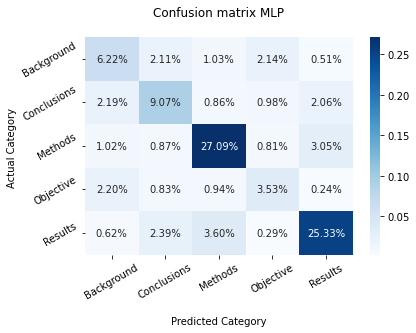

In [21]:
cf_matrix = metrics.confusion_matrix(y_test, pred_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion matrix MLP\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Background', 'Conclusions', 'Methods', 'Objective', 'Results'], rotation=30)
ax.yaxis.set_ticklabels(['Background', 'Conclusions', 'Methods', 'Objective', 'Results'], rotation=30)

## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
df_train["labels"].value_counts()

METHODS        59323
RESULTS        57950
CONCLUSIONS    27165
BACKGROUND     21727
OBJECTIVE      13839
Name: labels, dtype: int64